## 支持向量机
支持向量机(Support Vector Machine，SVM)是一种功能强大且用途广泛的机器学习模型，能够执行线性或非线性分类、回归，甚至异常检测。

SVM在中小型非线性数据集（即成百上千个实例）中大放异彩，尤其适用于分类任务。然而，它们不能很好地扩展到非常大的数据集（会讲一下它训练的所需时间 和 样本大小m/特征大小n的关系。）

教学顺序：SVM核心概念（目的是什么），如何使用，以及工作原理（了解即可，要涉及数学专业研究生学的数学）

### 线性SVM分类
SVM的基本思想可以用图来说明。下图所示的数据集来自鸢尾花数据集的一部分。两个类别可以轻松地被一条直线（它们是线性可分离的）分开。左图显示了三种可能的线性分类器的决策边界。决策边界用虚线表示的模型表现非常糟糕，它甚至都无法正确实现分类。其余两个模型在这个训练集上表现堪称完美，但是它们的决策边界与实例过于接近，从而导致在面对新实例时，表现可能不会太好。相比之下，右图中的实线代表SVM分类器的决策边界，这条线不仅分离了两个类，并且尽可能远离了最近的训练实例。

![大间隔分类](./images/svm/p1.png)

可以将SVM分类器视为在类之间拟合可能的最宽的街道（由平行的虚线表示）。因此这也叫作大间隔分类(large margin classification)。

注意：
1. SVM训练后，在“街道以外”的地方增加更多的训练实例根本不会对决策边界产生影响，也就是说，它完全由位于街道边缘的实例所决定（或者“支持”）。这些实例被称为支持向量

2. 支持向量对特征缩放敏感，如下图所示，在左图中，垂直刻度比水平刻度大得多，因此可能的最宽街道接近于水平，其中一个特征看起来毫无作用，在特征缩放（例如使用Scikit-Learn的StandardScaler）后，决策边界看起来好很多（见右图）

![决策边界对特征缩放敏感](./images/svm/p2.png)

#### 软间隔分类

如果严格地让所有实例都在街道以外，并且位于正确的一边，这就是硬间隔分类。硬间隔分类有两个主要问题：首先，它只在数据是线性可分离的时候才有效；其次，它对异常值非常敏感。下图显示了有一个额外异常值的鸢尾花数据：左图的数据根本找不出硬间隔，而右图最终显示的决策边界与之前的图所看到的无异常值时的决策边界也大不相同，这个模型可能无法很好地泛化。

![硬间隔对异常值的敏感度](./images/svm/p3.png)

要避免这些问题，需要使用更灵活的模型。目标是在保持街道尽可能宽阔和限制间隔违规（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡，这就是软间隔分类

软间隔：目标是在保持街道尽可能宽阔和限制间隔违规（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡，这就是软间隔分类。

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 2
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5,1.7], [5.0,1.5]]
svm_clf.predict(X_new)
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

todo: 分数测量每个实例和边界之间的有符号距离
LinearSVC没有估计概率，
除非把决策分数再训练个模型映射成概率

todo：多项式特征

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10, max_iter=10000,random_state=42))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

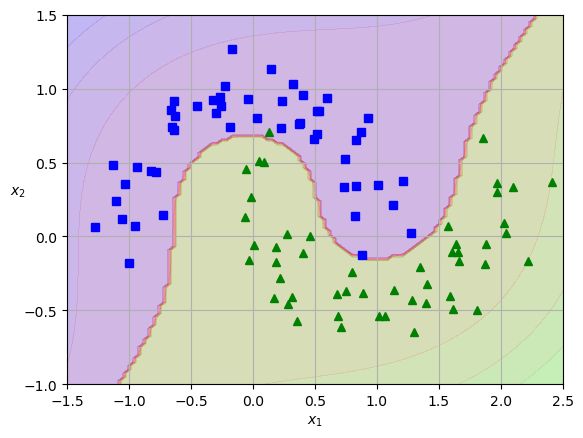

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)  # todo: 解释下这行代码   根据每个点的预测值，对应到每个点的颜色，颜色变化的边界就是svm的边界
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # # todo: 解释下这行代码

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

todo：核技巧，达到添加许多多项式特征的效果，但实际上不需要真的添加


In [13]:
from sklearn.svm import SVC

# todo： 解释coef0和C在做什么, coef0核函数的偏置项
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=0, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=0, kernel='poly'))])

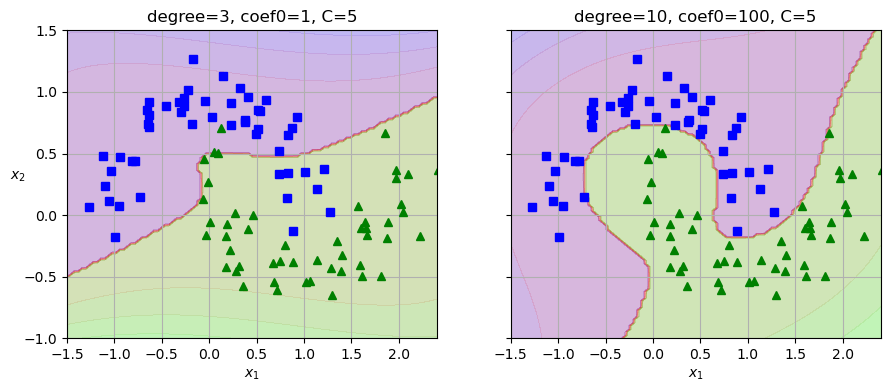

In [17]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# plt.sca:  # Set the current Axes to *ax* and the current Figure to the parent of *ax*.
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")
plt.show()

todo：相似性特征

高斯rbf核

In [18]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf",gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

todo: 解释gamma的作用

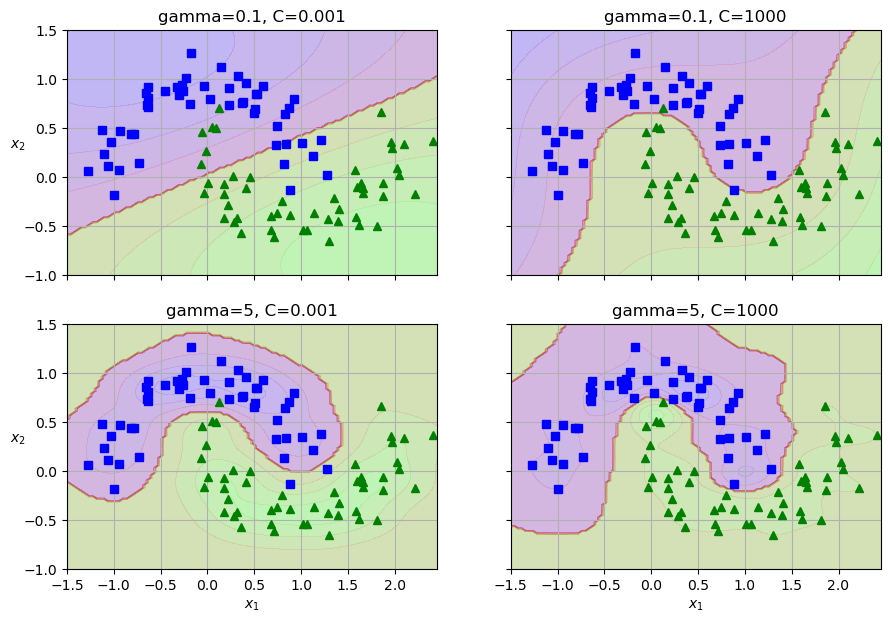

In [20]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

todo: 专门字符串的核函数
如何选择用哪一个和核函数

todo：SVM类的计算复杂度
比较LinearSVC, SVC和SGDClassifier

todo：SVM回归
SVM回归不是试图在两个类之间拟合最大可能的街道同时限制间隔违例，而是尝试在街道上拟合尽可能多的实例，同时限制间隔违例（即街道以外的实例

In [27]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

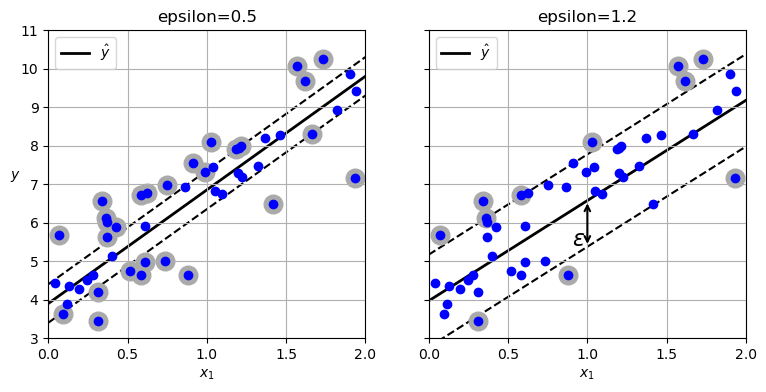

In [28]:
# todo: 解释这段代码
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

In [29]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

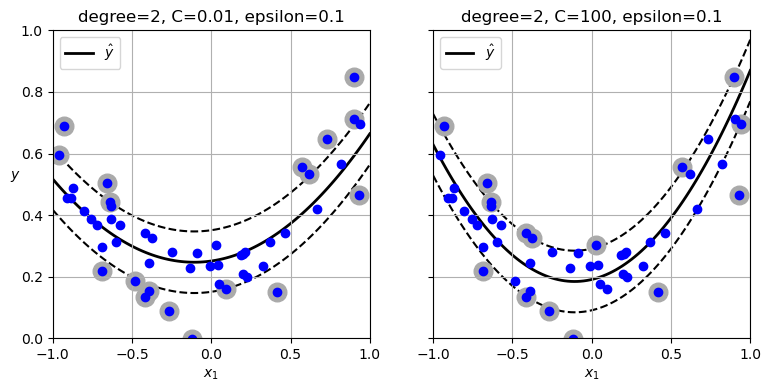

In [30]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

todo：SVR类是SVC类的等价物,LinearSVR类也是LinearSVC类的等价物，都会在训练集变大时变得很慢

todo: SVR分类器的工作原理：有约束的优化 -- 对偶 -- 核化的为什么不用手动添加特征